In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import torch

torch.manual_seed(42)

### **Creating Synthetic Data for Binary Classification** 

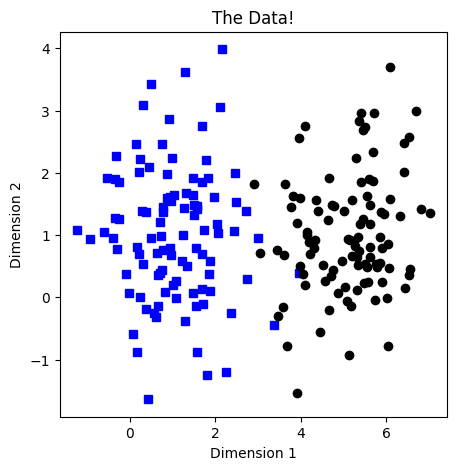

In [65]:
nPerClust = 100
blur = 1
A = [1,1]
B = [5,1]

a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

labels_np = np.vstack((
    -np.ones((nPerClust,1)),
    np.ones((nPerClust,1))
))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np,dtype=torch.float)
labels = torch.tensor(labels_np,dtype=torch.float)

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==-1)[0],0],data[np.where(labels==-1)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The Data!')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [66]:
print(data.shape)
print(labels.shape)

torch.Size([200, 2])
torch.Size([200, 1])


### **Perceptron Training**

In [ ]:
import torch

def perceptron(data, labels):
    
    weights = torch.randn(2, 1)
    bias = torch.randn(1)

    learning_rate = 0.01
    n_epochs = 1000

    for epoch in range(n_epochs):
        for i in range(data.shape[0]):

            x = data[i].reshape(2, 1)   
            y = labels[i].item()         

            z = weights.T @ x + bias      
            y_hat = 1 if z >= 0 else -1

            if y_hat != y:
                weights = weights + learning_rate * y * x
                bias = bias + learning_rate * y

    return weights, bias

### **Perceptron Implementation**

In [68]:
weights, bias = perceptron(data, labels)

print("Learned weights:", weights.flatten())
print("Learned bias:", bias)

Learned weights: tensor([0.2518, 0.0424])
Learned bias: tensor([-0.7455])


### **Line Creation for Decision Boundary**

In [75]:
slope = -weights[0]/weights[1]
intercept = -bias/weights[1]

x_input = np.linspace(-5 ,5, 100)
y_input = slope.item() * x_input + intercept.item()

print(f"Decision boundary: y = {slope.item():.2f}x + {intercept.item():.2f}")

Decision boundary: y = -5.94x + 17.58


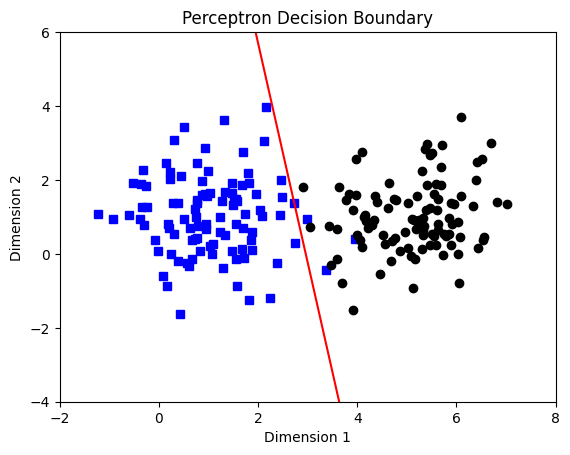

In [81]:
plt.plot(data[np.where(labels==-1)[0],0],data[np.where(labels==-1)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.ylim(-4, 6)
plt.xlim(-2, 8)
plt.plot(x_input, y_input, 'r-')
plt.title('Perceptron Decision Boundary')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()